In [1]:
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator


In [2]:
train_data_path = "dataset/Train"
test_data_path = "dataset/Test"
categories = ['freshapples', 'freshoranges', 'freshbanana', 'rottenapples', 'rottenoranges', 'rottenbanana']
batch_size = 32
img_height, img_width = 128, 128
input_image_shape = (img_width, img_height, 3)


train_datagen = ImageDataGenerator()
train_generator_x = train_datagen.flow_from_directory(
    directory=train_data_path,
    target_size=(img_width, img_height),
    batch_size=1,
    class_mode='binary',
    shuffle=True,
    classes=categories
)

train_data_list = []
for index in range(len(train_generator_x)):
    images, labels = train_generator_x[index]
    train_data_list.extend(list(zip(images, labels)))

Found 8733 images belonging to 4 classes.


In [3]:
train_data = np.array(train_data_list)

/var/folders/30/jbq9j0ys6x741mjd96j545kr0000gn/T/ipykernel_64973/7547442.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_data = np.array(train_data_list)


In [4]:
count_fa = 0
count_fo = 0
count_ra = 0
count_ro = 0
for i in range(len(train_generator_x)):
    num = train_data[i][1]
    if num == 0: 
        count_fa +=1
        train_data[i][1] = 1
    if num == 1: 
        count_fo +=1
        train_data[i][1] = 1
    if num == 2: 
        count_ra +=1
        train_data[i][1] = 0
    if num == 3: 
        count_ro +=1
        train_data[i][1] = 0

print(count_ro, count_ra, count_fa, count_fo)
    


1595 3248 2424 1466


In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_image_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [6]:
X_train = np.array([item[0] for item in train_data])
Y_train = np.array([item[1] for item in train_data])
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10


2024-05-02 09:55:16.367050: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


273/273 [==============================] - 48s 175ms/step - loss: 1.0101 - accuracy: 0.7523
Epoch 2/10
273/273 [==============================] - 47s 171ms/step - loss: 0.3143 - accuracy: 0.8688
Epoch 3/10
273/273 [==============================] - 48s 175ms/step - loss: 0.2422 - accuracy: 0.8987
Epoch 4/10
273/273 [==============================] - 47s 170ms/step - loss: 0.2247 - accuracy: 0.9138
Epoch 5/10
273/273 [==============================] - 46s 170ms/step - loss: 0.1758 - accuracy: 0.9308
Epoch 6/10
273/273 [==============================] - 46s 170ms/step - loss: 0.1391 - accuracy: 0.9462
Epoch 7/10
273/273 [==============================] - 46s 170ms/step - loss: 0.1035 - accuracy: 0.9636
Epoch 8/10
273/273 [==============================] - 47s 172ms/step - loss: 0.1292 - accuracy: 0.9526
Epoch 9/10
273/273 [==============================] - 49s 178ms/step - loss: 0.1256 - accuracy: 0.9531
Epoch 10/10
273/273 [==============================] - 51s 186ms/step - loss: 0.1102

In [7]:
test_datagen = ImageDataGenerator()
test_generator_x = test_datagen.flow_from_directory(
    directory=test_data_path,
    target_size=(img_width, img_height),
    batch_size=1,
    class_mode='binary',
    shuffle=True,
    classes=categories
)

test_data_list = []
for index in range(len(test_generator_x)):
    images, labels = test_generator_x[index]
    test_data_list.extend(list(zip(images, labels)))

Found 2570 images belonging to 4 classes.


In [8]:
test_data = np.array(test_data_list)

count_fa_test = 0
count_fo_test = 0
count_ra_test = 0
count_ro_test = 0
for i in range(len(test_generator_x)):
    num = test_data[i][1]
    if num == 0: 
        count_fa_test +=1
        test_data[i][1] = 1
    if num == 1: 
        count_fo_test +=1
        test_data[i][1] = 1
    if num == 2: 
        count_ra_test +=1
        test_data[i][1] = 0
    if num == 3: 
        count_ro_test +=1
        test_data[i][1] = 0

print(count_ro_test, count_ra_test, count_fa_test, count_fo_test)

403 988 791 388


/var/folders/30/jbq9j0ys6x741mjd96j545kr0000gn/T/ipykernel_64973/3861771843.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test_data = np.array(test_data_list)


In [9]:
X_test = np.array([item[0] for item in test_data])
Y_test = np.array([item[1] for item in test_data])

test_loss, test_acc = model.evaluate(X_test, Y_test)

print("Loss:", test_loss)
print("Acc:", test_acc)

81/81 [==============================] - 5s 57ms/step - loss: 0.0814 - accuracy: 0.9700
Loss: 0.08136963844299316
Acc: 0.970038890838623


In [10]:
test_datagen = ImageDataGenerator()
test_generator_x = test_datagen.flow_from_directory(
    directory=test_data_path,
    target_size=(img_width, img_height),
    batch_size=1,
    class_mode='binary',
    shuffle=True,
    classes=['freshapples', 'rottenapples', 'freshoranges', 'rottenoranges', 'freshbanana', 'rottenbanana']
)

test_data_list = []
for index in range(len(test_generator_x)):
    images, labels = test_generator_x[index]
    test_data_list.extend(list(zip(images, labels)))

Found 4362 images belonging to 6 classes.


In [11]:
import random as rn

int_dex = rn.randint(0, len(test_data_list))

test_data = np.array(test_data_list)
X_test_predict = np.array([test_data[int_dex][0]])

4362
1265


/var/folders/30/jbq9j0ys6x741mjd96j545kr0000gn/T/ipykernel_64973/3868821959.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test_data = np.array(test_data_list)


1/1 [==============================] - 0s 69ms/step


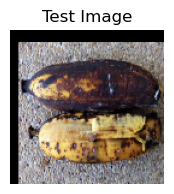

Classification: Rotten


In [12]:
prediction = model.predict(X_test_predict)
plt.figure(figsize=(2, 2))

title = ['Test Image']

for i in range(len(X_test_predict)):
    plt.subplot(1, len(X_test_predict), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.utils.array_to_img(X_test_predict[i]))
    plt.axis('off')
plt.show()
if prediction < .01: print('Classification: Rotten') 
else: print('Classification: Fresh')

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0